# Bean Type Predictor Neural Network

### Objectives:

This notebook performs the following tasks:

1. **Data Loading and Preprocessing**:
   - Loads the Dry Bean Dataset and checks for any missing values.
   - Splits the dataset into training, validation, and test sets.
   - Scales the features using `StandardScaler` to standardize the input data.

2. **Neural Network Model Creation**:
   - Defines multiple neural network architectures using custom models (`model1`, `model2`, `model3`).
   - Configures each model with a varying number of hidden layers and neurons, using ReLU activation for hidden layers and softmax for classification.

3. **Model Training**:
   - Trains each of the custom neural network models on the scaled training data for 1000 epochs.
   - Tracks and visualizes the cost (loss) vs iterations during training for all models using Matplotlib.

4. **Evaluation of Custom Models**:
   - Evaluates the trained models using accuracy and F1 score on the training, validation, and test sets.
   - Prints the accuracy and F1 scores for each model on each dataset (train, validation, and test).

5. **Building the Optimal Model with TensorFlow**:
   - Based on the evaluation of custom models, the best-performing architecture is implemented using TensorFlow’s Keras API (`tf.keras.Sequential`).
   - Configures the model with two hidden layers using ReLU activation and a linear output layer.
   - Compiles the model with the `SparseCategoricalCrossentropy` loss function and applies softmax internally via the `from_logits=True` argument.

6. **Training the TensorFlow Model**:
   - Trains the TensorFlow model for 1000 epochs on the scaled training data.
   - Plots iterations (epochs) vs cost (loss) after training.

7. **Prediction and Evaluation on TensorFlow Model**:
   - Uses the trained TensorFlow model to predict labels on the training, validation, and test datasets.
   - Converts the logits from the linear output layer into probabilities using `tf.nn.softmax()`.
   - Uses `argmax` to convert probabilities into class labels.
   - Evaluates the model’s performance on all datasets using accuracy and F1 score.


### This project uses data from [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/602/dry+bean+dataset). This dataset is licensed under a [Creative Commons Attribution 4.0 International (CC BY 4.0) license](https://creativecommons.org/licenses/by/4.0/legalcode). The dataset was converted into numpy arrays for building a machine learning model.

In [3]:
import numpy as np
import pandas as pd

# Load data from Excel file
df = pd.read_excel("DryBeanDataset/Dry_Bean_Dataset.xlsx")
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [4]:
# Check for missing values in the dataset
print(f"Any missing values in a dataset: '{df.isna().values.any()}'")

Any missing values in a dataset: 'False'


In [6]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and labels (Y)
X = df.iloc[:, :-1].values  # All columns except the last one are features
Y = (pd.factorize(df.iloc[:, -1])[0]).reshape(-1, 1)  # Encode the categorical labels as integers

# First split: Train + Validation and Test sets (70% for training/validation, 30% for test)
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

# Second split: Training and Validation sets (70% of train_val data for training, 30% for validation)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.3, random_state=42, stratify=Y_train_val)

# Output the shapes of the data splits for verification
print("Training set shape:", X_train.shape, Y_train.shape)
print("Validation set shape:", X_val.shape, Y_val.shape)
print("Testing set shape:", X_test.shape, Y_test.shape)

Training set shape: (6668, 16) (6668, 1)
Validation set shape: (2859, 16) (2859, 1)
Testing set shape: (4084, 16) (4084, 1)


In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler to scale the feature data
scaler = StandardScaler()

# Fit the scaler on the training data and transform it (normalization/standardization)
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the validation and test data (same scaling for consistency)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Output the shapes of the scaled datasets for verification
print("Scaled Training set shape:", X_train_scaled.shape)
print("Scaled Validation set shape:", X_val_scaled.shape)
print("Scaled Testing set shape:", X_test_scaled.shape)

Scaled Training set shape: (6668, 16)
Scaled Validation set shape: (2859, 16)
Scaled Testing set shape: (4084, 16)


In [8]:
import nn_base

# Custom neural network models (these are hypothetical models defined in nn_base)
model1 = nn_base.NeuralNetworkModel()
model2 = nn_base.NeuralNetworkModel()
model3 = nn_base.NeuralNetworkModel()

# Define model1 architecture with 2 hidden layers (16 and 12 units) and output layer with softmax
model1.sequential([
    model1.layer(units=16, activation="relu"),
    model1.layer(units=12, activation="relu"),
    model1.layer(units=7, activation="softmax"),
])

# Define model2 architecture with 3 hidden layers (16, 13, 10 units) and output layer with softmax
model2.sequential([
    model2.layer(units=16, activation="relu"),
    model2.layer(units=13, activation="relu"),
    model2.layer(units=10, activation="relu"),
    model2.layer(units=7, activation="softmax"),
])

# Define model3 architecture with 5 hidden layers (30, 25, 20, 15, 10 units) and output layer with softmax
model3.sequential([
    model3.layer(units=30, activation="relu"),
    model3.layer(units=25, activation="relu"),
    model3.layer(units=20, activation="relu"),
    model3.layer(units=15, activation="relu"),
    model3.layer(units=10, activation="relu"),
    model3.layer(units=7, activation="softmax"),
])

In [9]:
# List to store all the models
models = [model1, model2, model3]

# Train each custom model and track its progress
for i, model in enumerate(models):
    print(f"\nTraining Model_{i+1}:\n")
    model.fit(X_train_scaled, Y_train, epochs=1000, alpha=0.7) # Train the model for 1000 epochs


Training Model_1:

Epoch: 1/1000
cost = 2.8930828830726742
Epoch: 2/1000
cost = 2.4778219766674288
Epoch: 3/1000
cost = 2.0017954685184667
Epoch: 4/1000
cost = 1.683030379129142
Epoch: 5/1000
cost = 1.5299138802149173
Epoch: 6/1000
cost = 1.4566617006666664
Epoch: 7/1000
cost = 1.3985863485686134
Epoch: 8/1000
cost = 1.324010152173462
Epoch: 9/1000
cost = 1.2326236269869248
Epoch: 10/1000
cost = 1.1468750123236668
Epoch: 11/1000
cost = 1.080160714554327
Epoch: 12/1000
cost = 1.0211567269833528
Epoch: 13/1000
cost = 0.9532182952913691
Epoch: 14/1000
cost = 0.8704866628716651
Epoch: 15/1000
cost = 0.7818195842861534
Epoch: 16/1000
cost = 0.7017218152572359
Epoch: 17/1000
cost = 0.6392627812699998
Epoch: 18/1000
cost = 0.5942612985126483
Epoch: 19/1000
cost = 0.5579530841718481
Epoch: 20/1000
cost = 0.5219463984730095
Epoch: 21/1000
cost = 0.4873609401640376
Epoch: 22/1000
cost = 0.4580854917505573
Epoch: 23/1000
cost = 0.4346173445256246
Epoch: 24/1000
cost = 0.4153422639155577
Epoch: 2

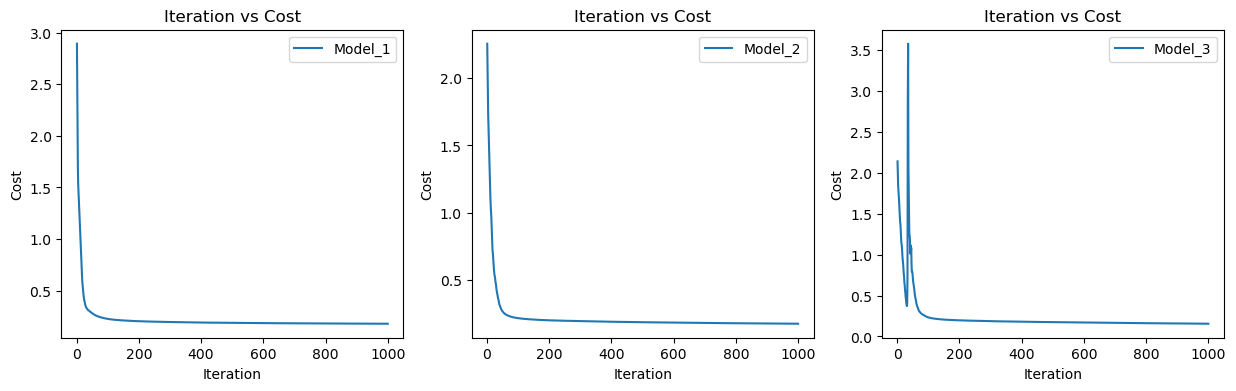

In [10]:
import matplotlib.pyplot as plt

# Plot iteration vs cost (loss) for each model
_, ax = plt.subplots(1, 3, figsize=(15, 4))

for i, model in enumerate(models):
    cost_hist = np.array(model.cost_history)  # Retrieve cost history
    ax[i].plot(cost_hist[:, 0], cost_hist[:, 1], label=f"Model_{i+1}")  # Plot iteration vs cost
    ax[i].set_title("Iteration vs Cost")
    ax[i].set_xlabel("Iteration")
    ax[i].set_ylabel("Cost")
    ax[i].legend()

Each model demonstrates a rapid decrease in cost during early iterations, followed by a gradual stabilization. These plots highlight how the models converge over time, indicating successful training and minimization of the loss function.

In [11]:
from sklearn.metrics import accuracy_score, f1_score

# Evaluate accuracy and F1 score on train and validation sets for each model
for i, model in enumerate(models):
    # Make predictions on the training and validation sets
    Y_hat_train = np.argmax(model.predict(X_train_scaled), axis=1, keepdims=True)
    Y_hat_val = np.argmax(model.predict(X_val_scaled), axis=1, keepdims=True)

    # Compute accuracy
    train_accuracy = accuracy_score(Y_train, Y_hat_train)
    val_accuracy = accuracy_score(Y_val, Y_hat_val)
    print(f"Model_{i+1} Train accuracy: {train_accuracy}, Model_{i+1} Val accuracy: {val_accuracy}")

    # Compute F1 score
    train_f1 = f1_score(Y_train, Y_hat_train, average="weighted")
    val_f1 = f1_score(Y_val, Y_hat_val, average="weighted")
    print(f"Model_{i+1} Train f1 score: {train_f1}, Model_{i+1} Val f1 score: {val_f1}\n")

Model_1 Train accuracy: 0.9355128974205159, Model_1 Val accuracy: 0.9265477439664218
Model_1 Train f1 score: 0.9355733316662291, Model_1 Val f1 score: 0.9264793940675027

Model_2 Train accuracy: 0.9385122975404919, Model_2 Val accuracy: 0.9296956977964324
Model_2 Train f1 score: 0.9385966768458408, Model_2 Val f1 score: 0.9296342534762314

Model_3 Train accuracy: 0.9443611277744451, Model_3 Val accuracy: 0.9275970619097587
Model_3 Train f1 score: 0.944361012410033, Model_3 Val f1 score: 0.9275333240207394



Among the evaluated neural network models, **Model_1** stands out as the optimal choice. Despite having one layer less than **Model_2**, and three layers fewer than **Model_3**, **Model_1** delivers remarkably close results to **Model_2** and **Model_3**, achieving a **training accuracy** of **93.55%** and a **validation accuracy** of **92.66%**, along with a **training F1 score** of **93.56%** and a **validation F1 score** of **92.65%**. This balance of efficiency and performance, combined with its simpler architecture, makes **Model_1** a compelling option. Now it's time to test the optimal model on test set, but for intuition we will evaluate all models on the testing set.

In [12]:
# Evaluate the custom models on the test set
for i, model in enumerate(models):
    # Make predictions on the test set
    Y_hat_test = np.argmax(model.predict(X_test_scaled), axis=1, keepdims=True)
    
    # Compute accuracy
    test_accuracy = accuracy_score(Y_test, Y_hat_test)
    print(f"Model_{i+1} Test accuracy: {test_accuracy}")

    # Compute F1 score
    test_f1 = f1_score(Y_test, Y_hat_test, average="weighted")
    print(f"Model_{i+1} Test f1 score: {test_f1}\n")

Model_1 Test accuracy: 0.9321743388834476
Model_1 Test f1 score: 0.9322468753201602

Model_2 Test accuracy: 0.9299706170421156
Model_2 Test f1 score: 0.9300731527181065

Model_3 Test accuracy: 0.9307051909892262
Model_3 Test f1 score: 0.9307093502141618



The testing results underscore the effectiveness of **Model_1** as the optimal choice. With a **test accuracy** of **93.22%** and a **test F1 score** of **93.22%**, **Model_1** not only maintains its impressive performance from the validation phase but also excels in testing phase. This superior performance is evident when compared to **Model_2** and **Model_3**, which, despite their competitive metrics, fall slightly behind in both accuracy and F1 score. **Model_1**’s ability to deliver such consistent and high-quality results across all stages of evaluation highlights its robustness and efficiency, confirming it as the best-suited model for the presented dataset.

In [15]:
import tensorflow as tf

# Define the optimal model architecture using TensorFlow based on the evaluation of custom models
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer with the feature size
    tf.keras.layers.Dense(16, activation="relu"),  # First hidden layer
    tf.keras.layers.Dense(12, activation="relu"),  # Second hidden layer
    tf.keras.layers.Dense(7, activation="linear")  # Output layer with linear activation (logits)
])

# Compile the TensorFlow model with Adam optimizer and SparseCategoricalCrossentropy loss
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)  # Specify softmax in loss
)

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │            91 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567 (2.21 KB)

 Trainable params: 567 (2.21 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the TensorFlow model
history = model.fit(X_train_scaled, Y_train,
                    epochs=1000,  # Train for 1000 epochs
                    batch_size=1000)  # Use a batch size of 1000 samples

Epoch 1/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 1.8114
Epoch 2/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1928 
Epoch 3/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8808 
Epoch 4/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6771 
Epoch 5/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5174  
Epoch 6/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3982  
Epoch 7/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3316
Epoch 8/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3035  
Epoch 9/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2773 
Epoch 10/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2679 
Epoch 11/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2517  
Epoch 12/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2302  
Epoch 13/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2352  
Epoch 14/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2312 
Epoch 15/1000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2286

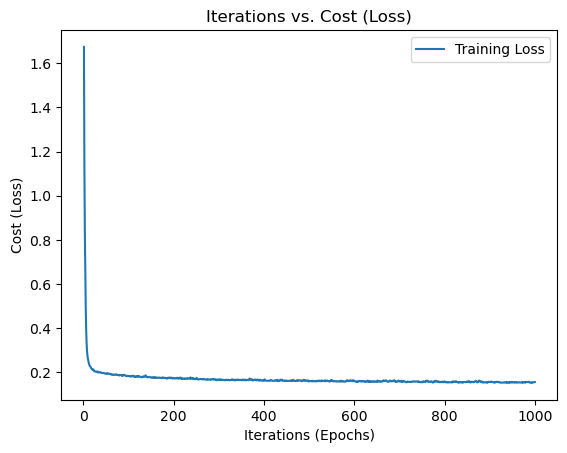

In [17]:
# Get the loss values from the training process
train_loss = history.history["loss"]  # Training loss for each epoch

# Plot iteration (epochs) vs cost (loss)
plt.plot(range(1, len(train_loss) + 1), train_loss, label="Training Loss")
plt.title("Iterations vs. Cost (Loss)")
plt.xlabel("Iterations (Epochs)")
plt.ylabel("Cost (Loss)")
plt.legend()

The same applies to the TensorFlow model, whose loss is comparable to that of the custom Model_1 and Model_2. However, it exhibits very little noise in the training loss.

In [28]:
# Create a list of datasets for predictions (train, validation, test)
all_data = [("Train", X_train_scaled, Y_train), ("Val", X_val_scaled, Y_val), ("Test", X_test_scaled, Y_test)]

# Predict and evaluate accuracy and F1 score for each dataset (train, validation, test)
for data in all_data:
    # Predict using the model (logits will be returned due to linear activation)
    logits = model.predict(data[1])

    # Apply softmax to convert logits to probabilities
    probabilities = tf.nn.softmax(logits, axis=1)

    # Use argmax to get the predicted class labels (highest probability)
    predicted_classes = np.argmax(probabilities, axis=1).reshape(-1, 1)

    # Compute accuracy for each dataset
    accuracy = accuracy_score(predicted_classes, data[2])
    print(f"{data[0]} accuracy: {accuracy}")

    # Compute F1 score for each dataset
    f1 = f1_score(predicted_classes, data[2], average="weighted")
    print(f"{data[0]} f1 score: {f1}\n")

209/209 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Train accuracy: 0.9424115176964607
Train f1 score: 0.9420708086998217

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Val accuracy: 0.925498426023085
Val f1 score: 0.9252437593596878

128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Test accuracy: 0.9331537708129285
Test f1 score: 0.9328856514341426



In comparing the results of **Model_1** with the TensorFlow model, we observe that both models demonstrate impressive performance. **Model_1** achieves a **test accuracy** of **93.22%** and a **test F1 score** of **93.22%**, showcasing its robustness and consistency across different stages of evaluation. In contrast, the TensorFlow model yields a **test accuracy** of **93.32%** and a **test F1 score** of **93.29%**. While the TensorFlow model shows a slight edge in both the test and train sets, **Model_1** continues to deliver strong performance on the validation set.

With these insights, we mark the successful completion of our project. Both models have proven their effectiveness, and we are now well-positioned to make informed decisions based on their performance.